<a href="https://colab.research.google.com/github/sk-cho97/stat/blob/main/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('tidyverse') 
install.packages('tm') 
install.packages('wordcloud') 
install.packages('wordcloud2') 
install.packages('tidytext') 
install.packages('reshape2') 
install.packages('RWeka') 
install.packages('knitr') 
install.packages('gridExtra') 
install.packages('grid') 
install.packages('igraph') 
install.packages('ggraph') 

In [291]:
library(tidyverse) 
library(tm) 
library(wordcloud) 
library(wordcloud2) 
library(tidytext) 
library(reshape2) 
library(RWeka) 
library(knitr) 
library(gridExtra) 
library(grid) 
library(igraph) 
library(ggraph) 
library(devtools)

Loading required package: usethis



In [ ]:
scripts <- read.csv("../content/lotr_scripts.csv", sep=",") #대사, 등장인물, 시리즈(1,2,3편)에 대한 정보
bing <- read_csv("../content/Bing.csv") #단어에 대해 긍정어휘인지 부정어휘인지 구분
nrc <- read_csv("../content/NRC.csv") #긍정, 부정, 분노, 기대감, 혐오감, 두려움, 기쁨, 슬픔, 놀라움 및 신뢰 범주로 단어 구분
afinn <- read_csv("../content/Afinn.csv") #긍정/ 부정 단어들을 각각 -5에서 +5점 사이 점수들 준다

데이터셋 저장

# 데이터 변환

In [139]:
cleanCorpus <- function(corpus){

  corpus.tmp <- tm_map(corpus, removePunctuation) #구두점 삭제
  corpus.tmp <- tm_map(corpus.tmp, stripWhitespace) #공백 삭제
  corpus.tmp <- tm_map(corpus.tmp, content_transformer(tolower)) #소문자로 통일
  v_stopwords <- c(stopwords("english"), c("thats","weve","hes","theres","ive","im",
                                           "will","can","cant","dont","youve","us",
                                           "youre","youll","theyre","whats","didnt")) #stopwords 설정
  corpus.tmp <- tm_map(corpus.tmp, removeWords, v_stopwords) #stopwrods 삭제
  corpus.tmp <- tm_map(corpus.tmp, removeNumbers) #숫자 삭제
  return(corpus.tmp)}

tm_map을 활용하여 텍스트 파일 안에 있는 문장의 공백,숫자, 기호, 대소문자 등

여러 요인들을 제거

stopwords는 문장에서 자주 나타나지만 
데이터로서 가치가 적은 대상을 삭제하는 기능

In [150]:
scripts[,2] %>% unique

[1] "DEAGOL"                   "SMEAGOL"                 
  [3] "(GOLLUM"                  "FRODO"                   
  [5] "MERRY"                    "GIMLI"                   
  [7] "GOLLUM"                   "SAM"                     
  [9] "GANDALF"                  "ARAGORN"                 
 [11] "PIPPIN"                   "HOBBIT"                  
 [13] "ROSIE"                    "BILBO"                   
 [15] "TREEBEARD"                "SARUMAN"                 
 [17] "THEODEN"                  "GALADRIL"                
 [19] "ELROND"                   "GRIMA"                   
 [21] "FRODO VOICE OVER"         "WITCH KING"              
 [23] "EOWYN"                    "FARAMIR"                 
 [25] "ORC"                      " GANDALF"                
 [27] "SOLDIERS ON GATE"         "GOTHMOG"                 
 [29] "GENERAL"                  "CAPTAIN"                 
 [31] "SOLDIER"                  "MOUTH OF SAURON"         
 [33] "EOMER"                    "ARMY"                    
 [35] "BOSON"                    "MERCENARY"               
 [37] "EOWYN/MERRY"              "DENETHOR"                
 [39] "ROHIRRIM"                 "GALADRIEL VOICEOVER"     
 [41] "LEGOLAS"                  "GALADRIEL"               
 [43] "KING OF THE DEAD"         "GRIMBOLD"                
 [45] "IROLAS"                   "ORCS"                    
 [47] "GAMLING"                  "MADRIL"                  
 [49] "DAMROD"                   "SOLDIERS"                
 [51] "SOLDIERS IN MINAS TIRITH" "GANDALF VOICEOVER"       
 [53] "SOLDIER 1"                "SOLDIER 2"               
 [55] "WOMAN"                    "HALDIR"                  
 [57] "SAM VOICEOVER"            "OLD MAN"                 
 [59] "BOROMIR"                  "CROWD"                   
 [61] "ARWEN"                    "ELROND VOICEOVER"        
 [63] "ARWEN VOICEOVER"          "ARAGORN "                
 [65] "HAMA"                     "SHARKU"                  
 [67] "PEOPLE"                   "LADY"                    
 [69] "FREDA"                    "MORWEN"                  
 [71] "EYE OF SAURON"            "ROHAN STABLEMAN"         
 [73] "GORBAG"                   "ARGORN"                  
 [75] "GANDALF VOICE OVER"       "BOROMIR "                
 [77] "UGLUK"                    "SHAGRAT"                 
 [79] "SARUMAN VOICE OVER"       "SARUMAN VOICE OVER "     
 [81] "FRODO "                   "URUK-HAI"                
 [83] "SNAGA"                    "GRISHNAKH"               
 [85] "MERRY and PIPPIN"         "WILDMAN"                 
 [87] "STRIDER"                  "GALADRIEL VOICE-OVER"    
 [89] "EOTHAIN"                  "ROHAN HORSEMAN"          
 [91] "SAURON VOICE"             "SAM "                    
 [93] "FRODO VOICE"              "GALADRIEL VOICE OVER"    
 [95] "FARMER MAGGOT"            "WHITE WIZARD"            
 [97] "MERRY AND PIPPIN"         "GAFFER"                  
 [99] "NOAKES"                   "SANDYMAN"                
[101] "FIGWIT"                   "GENERAL SHOUT"           
[103] "GRISHNAK"                 "URUK HAI"                
[105] "SARUMAN VOICEOVER"        "MRS BRACEGIRDLE"         
[107] "BILBO VOICEOVER"          "PROUDFOOT HOBBIT"        
[109] "GATEKEEPER"               "GATEKEEPR"               
[111] "MAN"                      "CHILDREN HOBBITS"        
[113] "BARLIMAN"                 "RING"                    
[115] "MEN"                      "VOICE"                   
[117] "SAURON"                   "GAN DALF"

핵심 등장인물은 

FRODO, MERRY, SAM, PIPPIN, GIMLI, GANDALF(WHITE WIZARD), ARAGORN(STRIDER), LEGOLAS, 

BILBO

FARAMIR, GAMLING, BOROMIR, ARWEN, 

SARUMAN, ORCS(ORCS, URUK-HAI), SAURON, GOLLUM(SMEAGOL)

으로 정리할 수 있으며 일부 GANDALF가 'WHITE WIZARD' 또는 'GAN DALF'로 되어있는 경우를 통합할 필요가 있어보인다.

그 외에도 각종 오타나 ORCS 중 개별 개체에 대해 ORCS로 통합

In [197]:
scripts$char[scripts$char == 'WHITE WIZARD']<-'GANDALF'
scripts$char[scripts$char == 'GANDALF VOICE OVER']<-'GANDALF'
scripts$char[scripts$char == 'GANDALF VOICEOVER']<-'GANDALF'
scripts$char[scripts$char == ' GANDALF']<-'GANDALF'
scripts$char[scripts$char == 'GAN DALF']<-'GANDALF'
scripts$char[scripts$char == 'SMEAGOL']<-'GOLLUM'
scripts$char[scripts$char == '(GOLLUM']<-'GOLLUM'
scripts$char[scripts$char == 'ORC']<-'ORCS'
scripts$char[scripts$char == 'UGLUK']<-'ORCS'
scripts$char[scripts$char == 'SHAGRAT']<-'ORCS'
scripts$char[scripts$char == 'URUK-HAI']<-'ORCS'
scripts$char[scripts$char == 'SNAGA']<-'ORCS'
scripts$char[scripts$char == 'GRISHNAKH']<-'ORCS'
scripts$char[scripts$char == 'GRISHNAK']<-'ORCS'
scripts$char[scripts$char == 'URUK HAI']<-'ORCS'
scripts$char[scripts$char == 'SHARKU']<-'ORCS'
scripts$char[scripts$char == 'STRIDER']<-'ARAGORN'
scripts$char[scripts$char == 'ARAGORN ']<-'ARAGORN'
scripts$char[scripts$char == 'ARGORN']<-'ARAGORN'
scripts$char[scripts$char == 'FRODO ']<-'FRODO'
scripts$char[scripts$char == 'FRODO VOICE']<-'FRODO'
scripts$char[scripts$char == 'FRODO VOICE OVER']<-'FRODO'
scripts$char[scripts$char == 'MOUTH OF SAURON']<-'SAURON'
scripts$char[scripts$char == 'EYE OF SAURON']<-'SAURON'
scripts$char[scripts$char == 'SAURON VOICE']<-'SAURON'
scripts$char[scripts$char == 'GALADRIEL VOICEOVER']<-'GALADRIEL'
scripts$char[scripts$char == 'GALADRIEL VOICE-OVER']<-'GALADRIEL'
scripts$char[scripts$char == 'GALADRIEL VOICE OVER']<-'GALADRIEL'
scripts$char[scripts$char == 'GALADRIL']<-'GALADRIEL'
scripts$char[scripts$char == 'SAM VOICEOVER']<-'SAM'
scripts$char[scripts$char == 'SAM ']<-'SAM'
scripts$char[scripts$char == 'ARWEN VOICEOVER']<-'ARWEN'
scripts$char[scripts$char == 'SARUMAN VOICE OVER']<-'SARUMAN'
scripts$char[scripts$char == 'SARUMAN VOICE OVER ']<-'SARUMAN'
scripts$char[scripts$char == 'SARUMAN VOICEOVER']<-'SARUMAN'
scripts$char[scripts$char == 'BILBO VOICEOVER']<-'BILBO'
scripts$char[scripts$char == 'BOROMIR ']<-'BOROMIR'
scripts$char[scripts$char == 'ELROND VOICEOVER']<-'ELROND'

In [198]:
scripts[,2] %>% unique

[1] "DEAGOL"                   "GOLLUM"                  
 [3] "FRODO"                    "MERRY"                   
 [5] "GIMLI"                    "SAM"                     
 [7] "GANDALF"                  "ARAGORN"                 
 [9] "PIPPIN"                   "HOBBIT"                  
[11] "ROSIE"                    "BILBO"                   
[13] "TREEBEARD"                "SARUMAN"                 
[15] "THEODEN"                  "GALADRIEL"               
[17] "ELROND"                   "GRIMA"                   
[19] "WITCH KING"               "EOWYN"                   
[21] "FARAMIR"                  "ORCS"                    
[23] " GANDALF"                 "SOLDIERS ON GATE"        
[25] "GOTHMOG"                  "GENERAL"                 
[27] "CAPTAIN"                  "SOLDIER"                 
[29] "SAURON"                   "EOMER"                   
[31] "ARMY"                     "BOSON"                   
[33] "MERCENARY"                "EOWYN/MERRY"             
[35] "DENETHOR"                 "ROHIRRIM"                
[37] "LEGOLAS"                  "KING OF THE DEAD"        
[39] "GRIMBOLD"                 "IROLAS"                  
[41] "GAMLING"                  "MADRIL"                  
[43] "DAMROD"                   "SOLDIERS"                
[45] "SOLDIERS IN MINAS TIRITH" "SOLDIER 1"               
[47] "SOLDIER 2"                "WOMAN"                   
[49] "HALDIR"                   "OLD MAN"                 
[51] "BOROMIR"                  "CROWD"                   
[53] "ARWEN"                    "HAMA"                    
[55] "PEOPLE"                   "LADY"                    
[57] "FREDA"                    "MORWEN"                  
[59] "ROHAN STABLEMAN"          "GORBAG"                  
[61] "MERRY and PIPPIN"         "WILDMAN"                 
[63] "EOTHAIN"                  "ROHAN HORSEMAN"          
[65] "FARMER MAGGOT"            "MERRY AND PIPPIN"        
[67] "GAFFER"                   "NOAKES"                  
[69] "SANDYMAN"                 "FIGWIT"                  
[71] "GENERAL SHOUT"            "MRS BRACEGIRDLE"         
[73] "PROUDFOOT HOBBIT"         "GATEKEEPER"              
[75] "GATEKEEPR"                "MAN"                     
[77] "CHILDREN HOBBITS"         "BARLIMAN"                
[79] "RING"                     "MEN"                     
[81] "VOICE"

# 대사와 인물

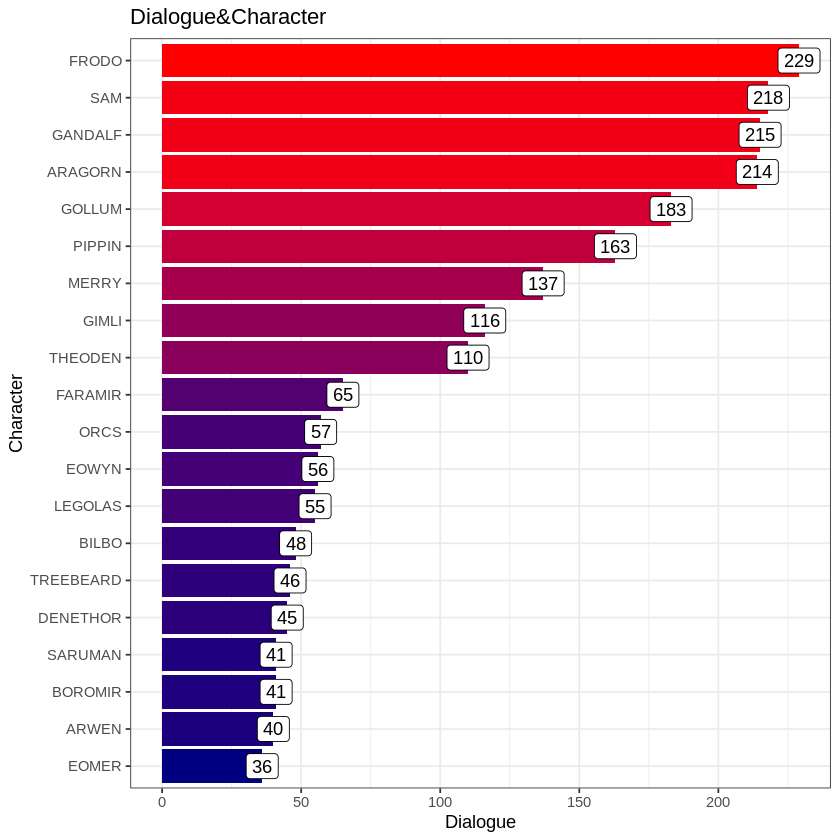

In [259]:
scripts %>% 
  count(char) %>% #등장인물의 대사 횟수
  arrange(desc(n)) %>% #횟수를 내림차순 정렬
  slice(1:20) %>% #상위 20개까지 나타냄
  ggplot(aes(x=reorder(char, n), y=n)) +  #plot 형태
  geom_bar(stat="identity", aes(fill=n), show.legend=F) +  
  geom_label(aes(label=n)) +
  scale_fill_gradient(low="navy", high="red") + #count 수치에 따른 색깔의 변화
  labs(x='Character', y="Dialogue",
       title="Dialogue&Character") +  
  coord_flip() + #x축과 y축 바꾸어서 표현
  theme_bw()
 #횟수로 나타냄

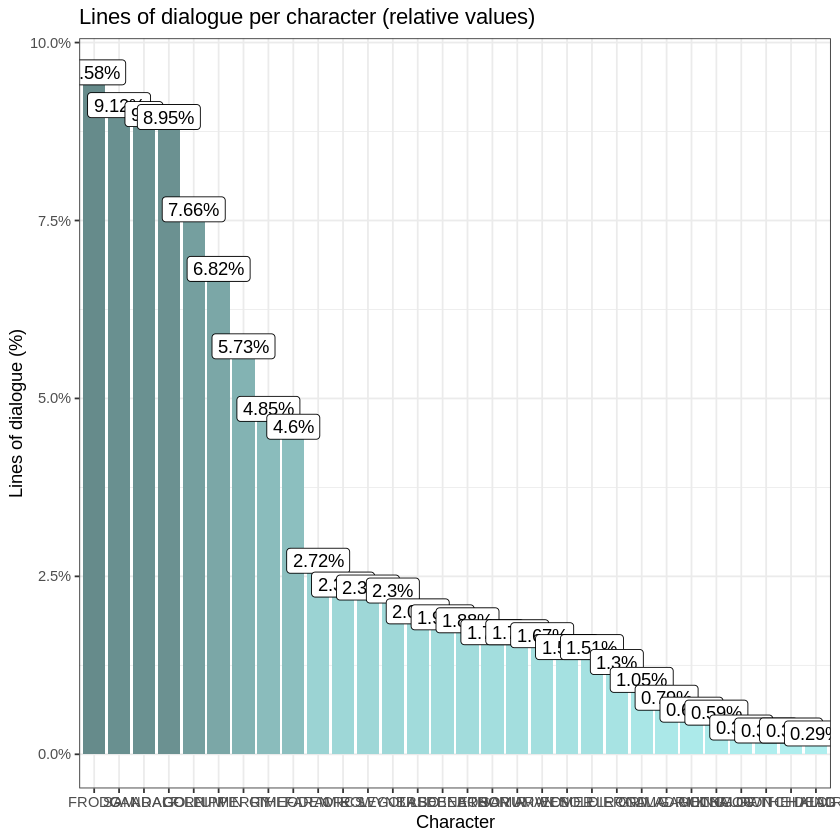

In [235]:
scripts %>% 
  count(char) %>%
  arrange(desc(n)) %>%
  slice(1:30) %>% #상위 30개 확인
  mutate(Percentage=n/nrow(scripts)) %>% #Percentage 항목 생성
  ggplot(aes(x=reorder(char, -Percentage), y=Percentage)) +
  geom_bar(stat="identity", aes(fill=Percentage), show.legend=FALSE) + 
  geom_label(aes(label=paste0(round(Percentage*100, 2), "%"))) + #횟수를 비율로 나타내며 소수점 2자리까지 나타내고 %를 붙여 표시
  scale_y_continuous(labels=scales::percent) +
  scale_fill_gradient(low="paleturquoise", high="paleturquoise4") +
  labs(x="Character", y="Lines of dialogue (%)", 
       title="Lines of dialogue per character (relative values)") + 
  theme_bw()
#비율로 나타냄

전체 영화 비중으로 보았을 때

상위 9명(Frodo, Sam, Gandalf, Aragorn, Pippin, Merry, Gollum, Gimli, Theoden)

대사가 꽤 비중이 큰 편임을 알 수 있다.

특이하게 LEGOLAS는 주연급임에도 대사가 적다

골룸은 혼잣말을 하는 특성 덕에 대사가 많은 편

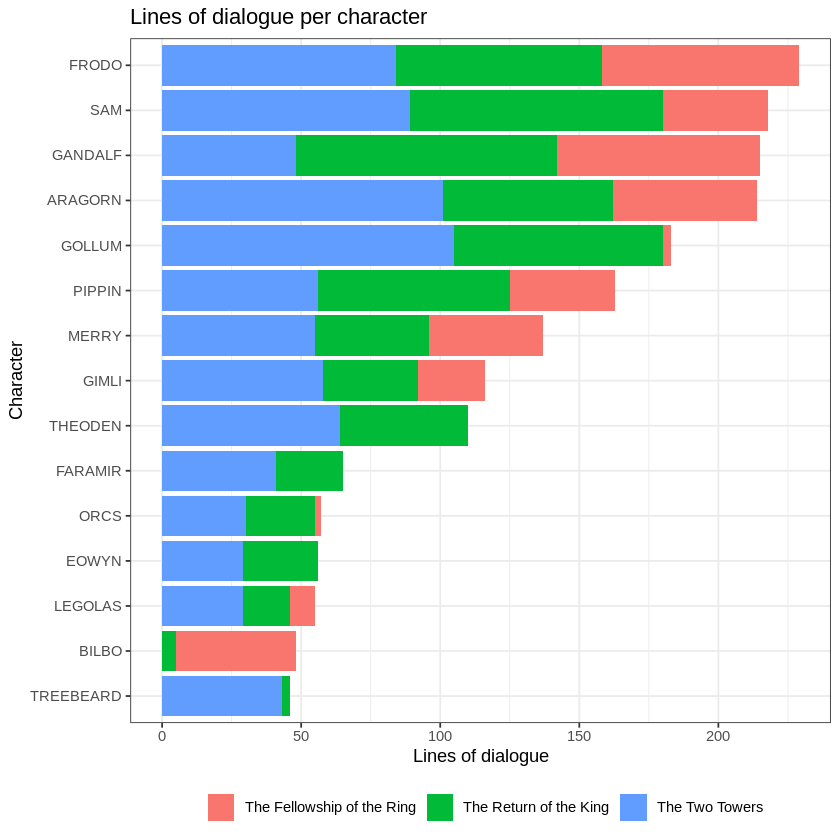

In [260]:
plot1 <- scripts %>%
  filter(char %in% c("FRODO", "SAM", "GANDALF", "ARAGORN", "PIPPIN",  
                     "MERRY", "GOLLUM", "GIMLI", "THEODEN", "FARAMIR",
                     "EOWYN", "LEGOLAS", "ORCS", "TREEBEARD", "BILBO")) %>% #위의 결과에 따라 15 캐릭터 선정
  count(movie, char) %>%
  ggplot(aes(x=reorder(char, n, sum), y=n)) +
  geom_bar(stat="identity", aes(fill=movie)) +
  labs(x="Character", y="Lines of dialogue", 
       title="Lines of dialogue per character") +
  theme_bw() +
  theme(legend.position="bottom",
        legend.title=element_blank()) +
  coord_flip()

plot1
#각 시리즈별 인물의 대사 량

Theoden, Faramir, Eowyn, Treebeard, Bilbo 등 특정 편에만 등장하는 인물이 존재함을 알 수 있음

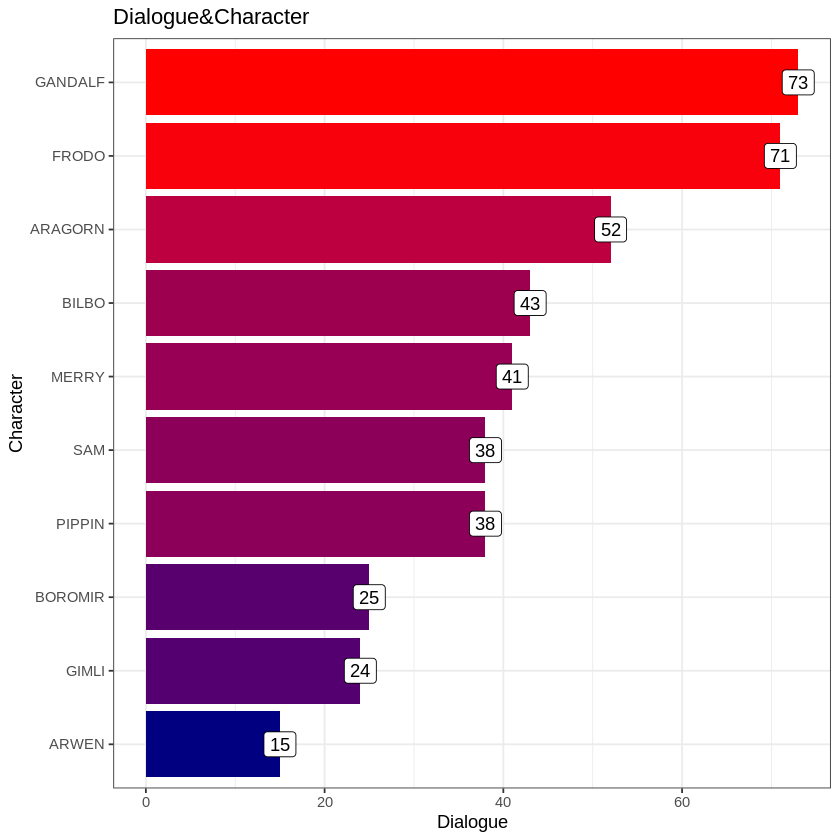

In [232]:
scripts %>%
  filter(movie == "The Fellowship of the Ring ") %>%
  count(char) %>% 
  arrange(desc(n)) %>%
  slice(1:10) %>%
  ggplot(aes(x=reorder(char, n), y=n)) +  
  geom_bar(stat="identity", aes(fill=n), show.legend=F) +  
  geom_label(aes(label=n)) +
  scale_fill_gradient(low="navy", high="red") + 
  labs(x='Character', y="Dialogue",
       title="Dialogue&Character") +  
  coord_flip() + 
  theme_bw()
  

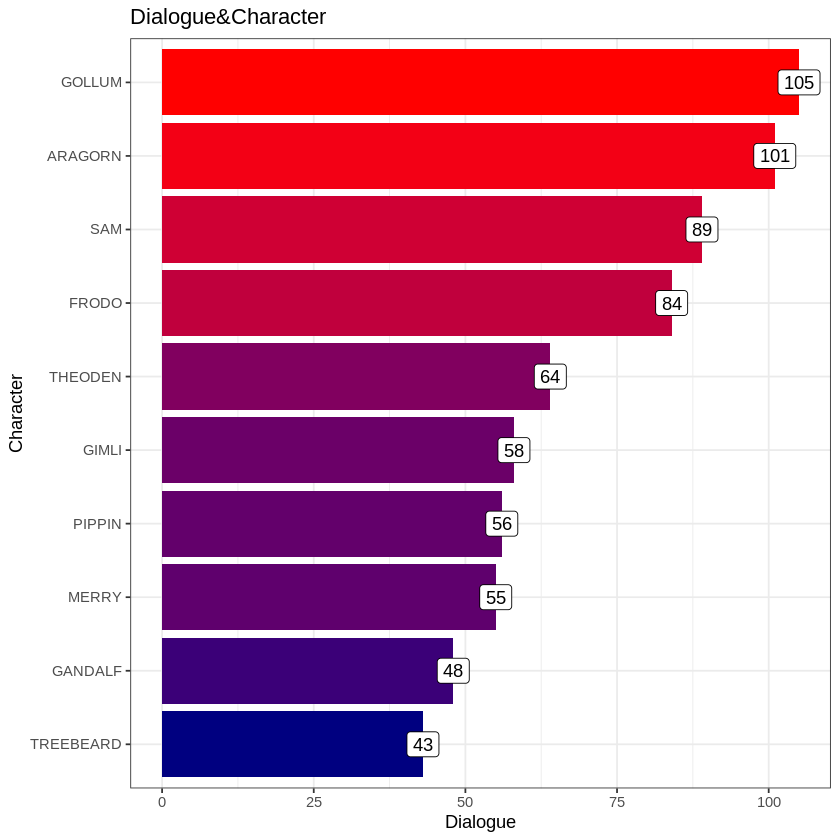

In [233]:
scripts %>%
  filter(movie == "The Two Towers ") %>%
  count(char) %>% 
  arrange(desc(n)) %>%
  slice(1:10) %>%
  ggplot(aes(x=reorder(char, n), y=n)) +  
  geom_bar(stat="identity", aes(fill=n), show.legend=F) +  
  geom_label(aes(label=n)) +
  scale_fill_gradient(low="navy", high="red") + 
  labs(x='Character', y="Dialogue",
       title="Dialogue&Character") +  
  coord_flip() + 
  theme_bw()

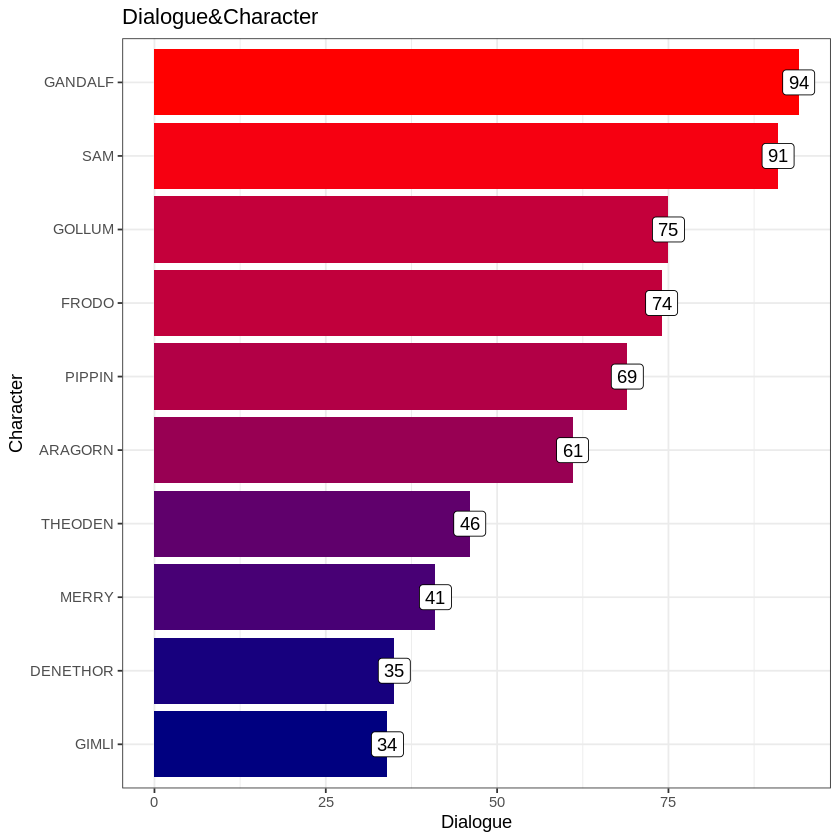

In [234]:
scripts %>%
  filter(movie == "The Return of the King ") %>%
  count(char) %>% 
  arrange(desc(n)) %>%
  slice(1:10) %>%
  ggplot(aes(x=reorder(char, n), y=n)) +  
  geom_bar(stat="identity", aes(fill=n), show.legend=F) +  
  geom_label(aes(label=n)) +
  scale_fill_gradient(low="navy", high="red") + 
  labs(x='Character', y="Dialogue",
       title="Dialogue&Character") +  
  coord_flip() + 
  theme_bw()

각 영화별로 분량 상위 10개 인물


반지원정대 : 간달프, 프로도, 아라곤, 빌보, 메리, 샘, 피핀, 보로미르, 김리, 아르웬

두개의 탑 : 골룸, 아라곤, 샘, 프로도, 세오덴, 김리, 피핀, 메리, 간달프, 나무수염

왕의 귀환 : 간달프, 샘, 골룸, 프로도, 피핀, 아라곤, 세오덴, 메리, 데네토르, 김리 

In [204]:
scripts[,4] %>% unique

[1] "The Return of the King "     "The Two Towers "            
[3] "The Fellowship of the Ring "

In [262]:
lotr <- scripts %>%
  filter(char %in% c("FRODO", "SAM", "GANDALF", "ARAGORN", "PIPPIN",  
                     "MERRY", "GOLLUM", "GIMLI", "THEODEN", "FARAMIR",
                     "EOWYN", "LEGOLAS", "ORCS", "TREEBEARD", "BILBO"))

In [265]:
lotr[,2] %>% unique

[1] "GOLLUM"    "FRODO"     "MERRY"     "GIMLI"     "SAM"       "GANDALF"  
 [7] "ARAGORN"   "PIPPIN"    "BILBO"     "TREEBEARD" "THEODEN"   "EOWYN"    
[13] "FARAMIR"   "ORCS"      "LEGOLAS"

전체 영화에서 비중이 높은 등장인물들의 각 영화에서의 비율을 살펴보자

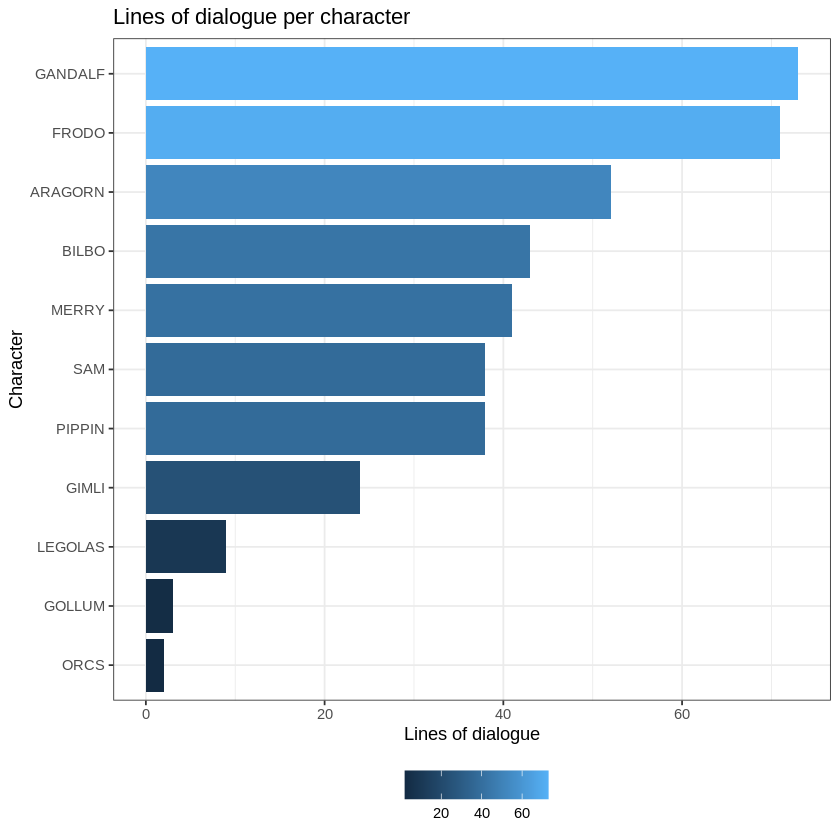

In [267]:
plot_lotr1 <- lotr %>% 
  filter(movie == "The Fellowship of the Ring ") %>%
  count(char) %>%
  ggplot(aes(x=reorder(char, n, sum), y=n)) +
  geom_bar(stat="identity", aes(fill=n)) +
  labs(x="Character", y="Lines of dialogue", 
       title="Lines of dialogue per character") +
  theme_bw() +
  theme(legend.position="bottom",
        legend.title=element_blank()) +
  coord_flip()

plot_lotr1

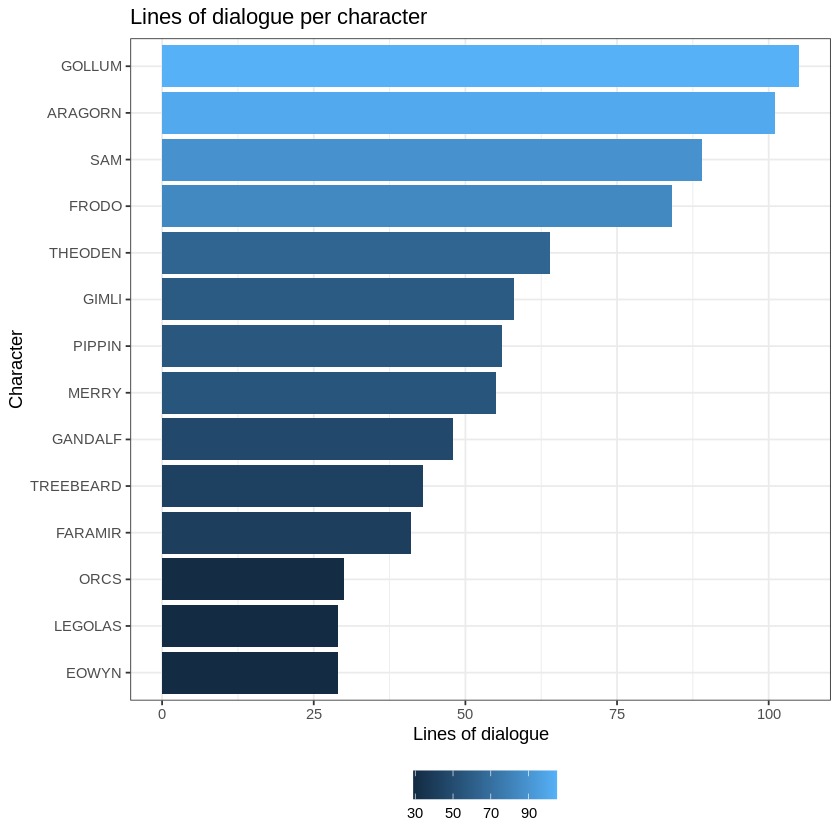

In [268]:
plot_lotr2 <- lotr %>% 
  filter(movie == "The Two Towers ") %>%
  count(char) %>%
  ggplot(aes(x=reorder(char, n, sum), y=n)) +
  geom_bar(stat="identity", aes(fill=n)) +
  labs(x="Character", y="Lines of dialogue", 
       title="Lines of dialogue per character") +
  theme_bw() +
  theme(legend.position="bottom",
        legend.title=element_blank()) +
  coord_flip()

plot_lotr2

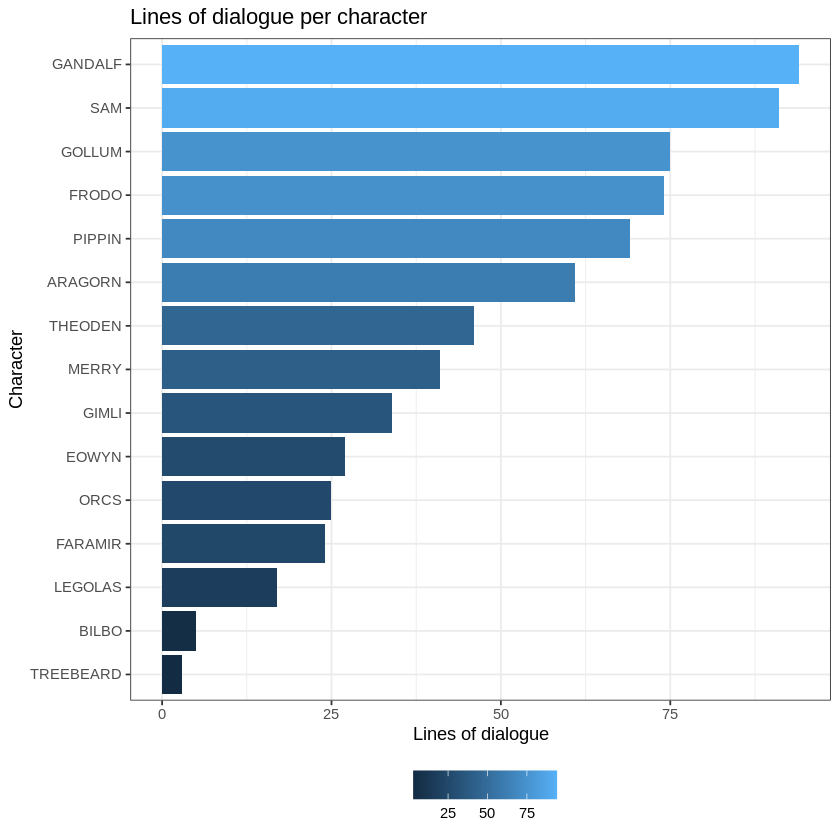

In [269]:
plot_lotr3 <- lotr %>% 
  filter(movie == "The Return of the King ") %>%
  count(char) %>%
  ggplot(aes(x=reorder(char, n, sum), y=n)) +
  geom_bar(stat="identity", aes(fill=n)) +
  labs(x="Character", y="Lines of dialogue", 
       title="Lines of dialogue per character") +
  theme_bw() +
  theme(legend.position="bottom",
        legend.title=element_blank()) +
  coord_flip()

plot_lotr3

주로 대사를 가장 많이 하는 인물은 간달프, 샘, 프로도이며 

골룸은 1편에 비해 2,3편에서 분량이 굉장히 크게 증가했다.

레골라스의 경우 영화의 비중을 생각하면 기존의 대사 비율이 꾸준히 낮게 유지되고 있다.

그리고 특이하게도 프로도는 영화의 가장 중요한 인물임에도 대사량 1위를 한 적이 없다.

빌보는 1편 이후로 거의 대사량이 없는 수준이다.

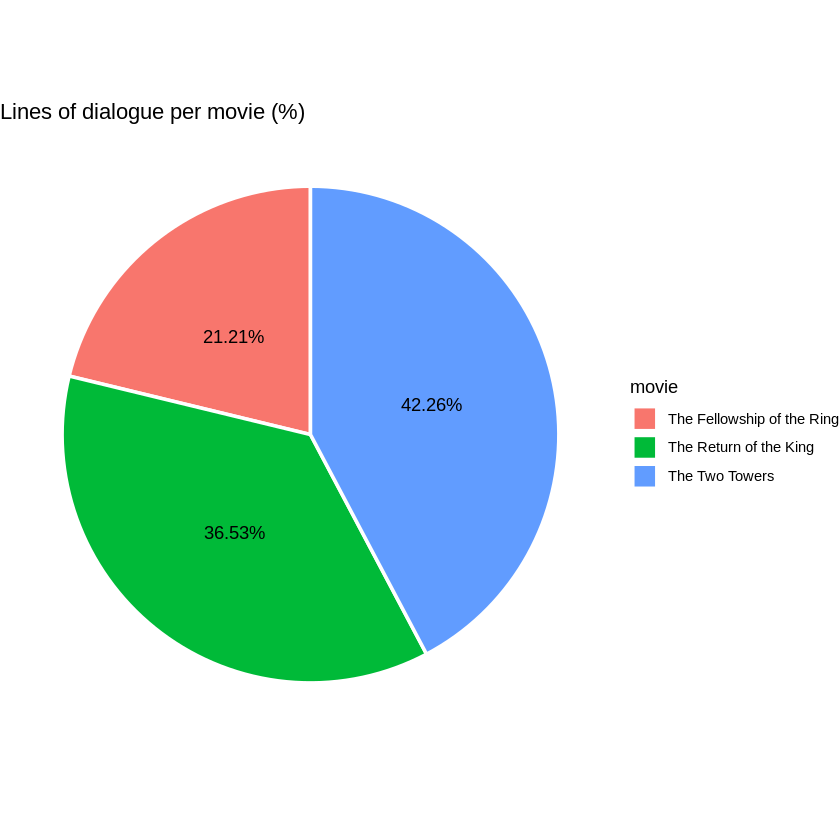

In [270]:
plot2 <- scripts %>%
  count(movie) %>% #영화의 수 "The Fellowship of the Ring", "The Two Towers", "The Return of the King" 3종류를 센다.
  mutate(Percentage=paste0(round(n/sum(n)*100, 2), "%")) %>% #Percentage 항목 생성
  ggplot(aes(x=factor(1), y=n, fill=movie)) + 
  geom_bar(stat="identity", width=1, size=1, color="white", show.legend=TRUE) +
  coord_polar(theta="y") + #원 그래프로 변경
  labs(title="Lines of dialogue per movie (%)") +
  theme_void() +
  geom_text(aes(label=Percentage),
            position=position_stack(vjust = 0.5))

plot2 #각 영화간의 대사의 비율

실제 영화의 상영시간은 일반 (확장판)

반지원정대 : 178분 (208분)

두개의 탑 : 179분 (223분)

왕의 귀환 : 201분 (251분)

으로 대사의 비율이 1:2:2 에 가까운 것에 비해 상영 시간은 큰 차이가 없다.

# Bing, Nrc, Afinn을 활용한 감정에 따른 단어 분류  

In [271]:
tokens <- scripts %>%  
  mutate(dialogue=as.character(scripts$dialog)) %>%
  unnest_tokens(word, dialogue)

각 대사를 단어 단위로 분해

Joining, by = "word"



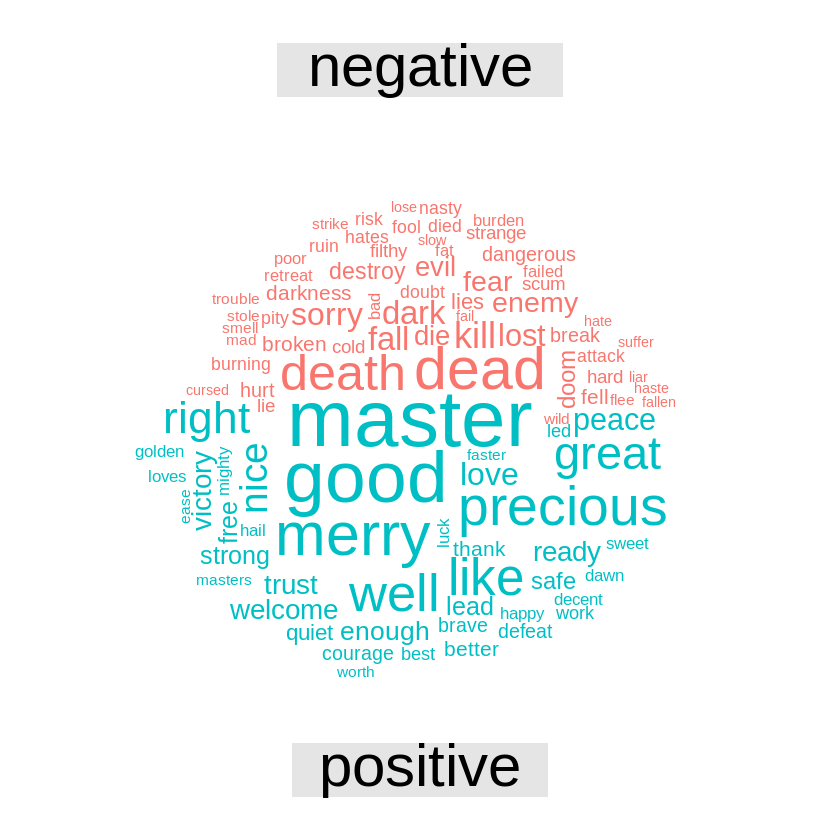

In [272]:
tokens %>%
  inner_join(get_sentiments("bing")) %>% #단어를 "bing" 기준으로 긍정, 부정에 따라 나누어 줌
  count(word, sentiment, sort=TRUE) %>% 
  acast(word ~ sentiment, value.var="n", fill=0) %>% #데이터 구조화
  comparison.cloud(colors=c("#F8766D", "#00BFC4"), max.words=100)

시각화 결과 긍정적인 단어가 더 많은 듯 보인다.

다만 Master, precious는 극중 악역에 해당하는 Gollum, Smeagol의 대사가 많았으며

Merry는 등장인물의 이름임을 고려하여 이 셋을 제거해보자

In [273]:
tokens <- tokens[!(tokens$word == "master" ), ]
tokens <- tokens[!(tokens$word == "precious" ), ]
tokens <- tokens[!(tokens$word == "merry" ), ]

Joining, by = "word"



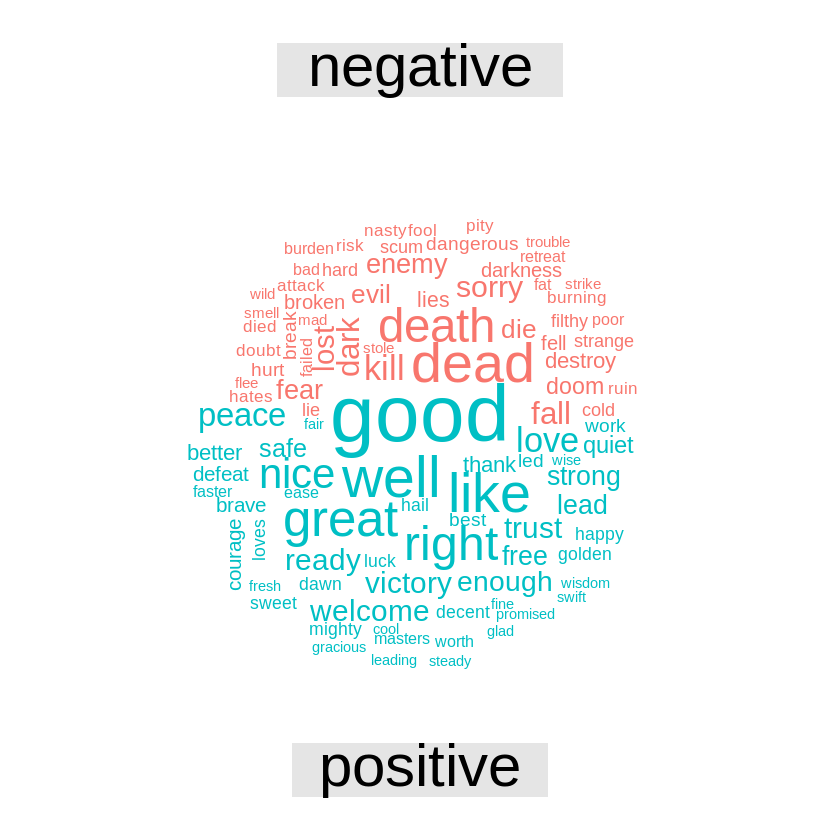

In [274]:
tokens %>%
  inner_join(get_sentiments("bing")) %>% 
  count(word, sentiment, sort=TRUE) %>% 
  acast(word ~ sentiment, value.var="n", fill=0) %>% 
  comparison.cloud(colors=c("#F8766D", "#00BFC4"), max.words=100)

여전히 비중이 positive가 조금 우위에 있으나 위 3 단어를 제거하기 전보다는 비율이 비슷해졌다.

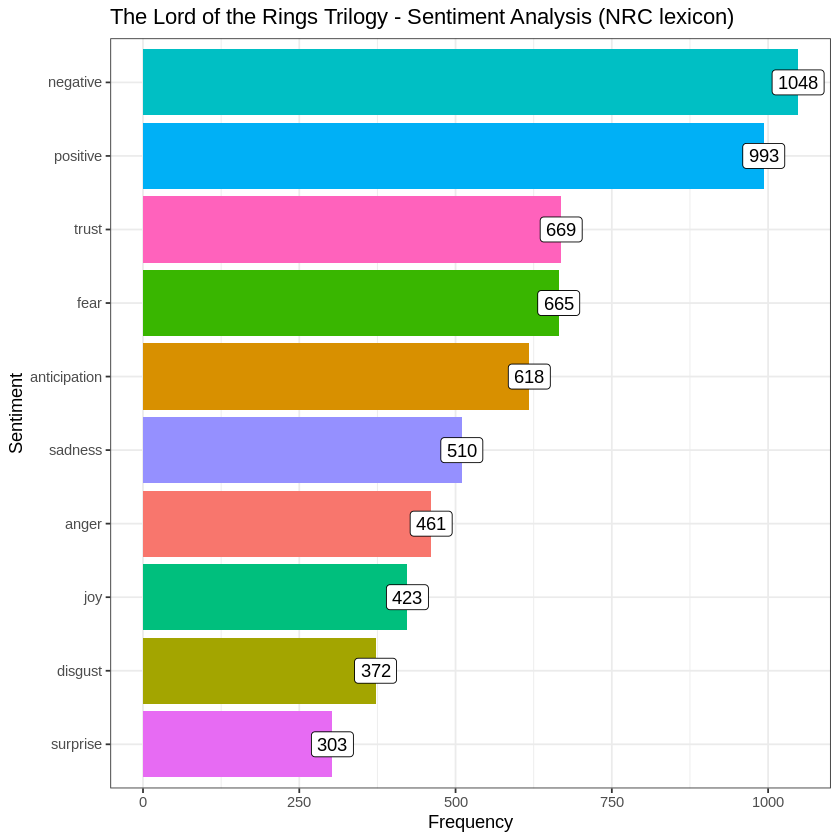

In [275]:
sentiments <- tokens %>% 
  inner_join(nrc, "word") %>% #nrc를 통해 긍정/부정을 포함한 더 많은 범주로 단어를 구분
  count(sentiment, sort=TRUE) 

ggplot(data=sentiments, aes(x=reorder(sentiment, n), y=n)) + 
  geom_bar(stat="identity", aes(fill=sentiment), show.legend=FALSE) +
  geom_label(label=sentiments$n) +
  labs(x="Sentiment", y="Frequency", 
       title="The Lord of the Rings Trilogy - Sentiment Analysis (NRC lexicon)") +
  coord_flip() +
  theme_bw()

Nrc의 10가지 범주에 따른 분류상 긍정/부정 다음으로 가장 많이 나타난 감정은
신뢰와 공포, 기대감이 주류를 이루고 있다.

In [276]:
sentiments1 <- tokens %>%
  filter(movie=="The Fellowship of the Ring ") %>%
  inner_join(nrc, "word") %>%
  count(sentiment, sort=TRUE) 

In [277]:
sentiments2 <- tokens %>%
  filter(movie=="The Two Towers ") %>%
  inner_join(nrc, "word") %>%
  count(sentiment, sort=TRUE) 

In [278]:
sentiments3 <- tokens %>%
  filter(movie=="The Return of the King ") %>%
  inner_join(nrc, "word") %>%
  count(sentiment, sort=TRUE) 

각 영화별로 nrc 기준에 따라 단어 정리

In [279]:
sentiments1$Movie <- rep("The Fellowship of the Ring", 10) #nrc 10개 분류에 따라 각 시리즈를 구분할 칼럼 생성
sentiments2$Movie <- rep("The Two Towers", 10)
sentiments3$Movie <- rep("The Return of the King", 10)
sentiments123 <- rbind(sentiments1, sentiments2, sentiments3)

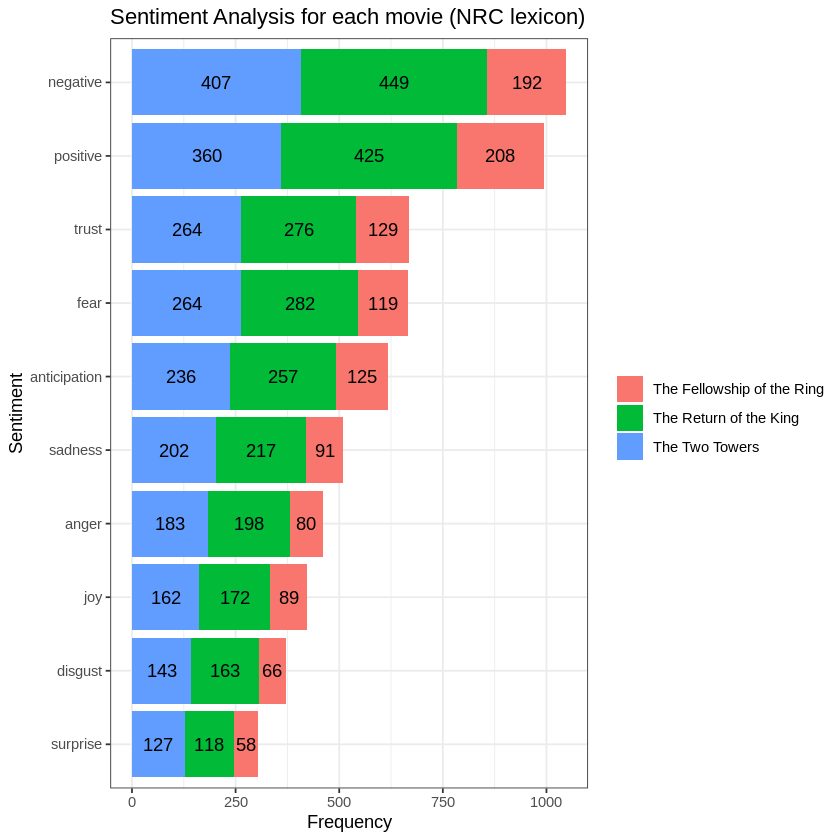

In [280]:
ggplot(data=sentiments123, aes(x=reorder(sentiment, n, sum), y=n)) +
  geom_bar(stat="identity", aes(fill=Movie)) +
  geom_text(aes(label=n, group=Movie), position=position_stack(vjust=0.5)) +
  labs(x="Sentiment", y="Frequency", 
       title="Sentiment Analysis for each movie (NRC lexicon)") +
  theme_bw() +
  theme(legend.title=element_blank()) +
  coord_flip()

각 영화에서 나타난 nrc기준 감정의 비중은 크게 다르지 않았다.

In [281]:
tokens <- scripts %>%  
  mutate(dialogue=as.character(scripts$dialog)) %>%
  unnest_tokens(word, dialogue)

tokens <- tokens[!(tokens$word == "merry" ), ]

nrc 범주에 따라 각 감정을 드러내는 단어는 무었이 있는 지 확인

토큰을 다시 작성하고 이번에도 Merry는 등장인물의 이름이므로 제거

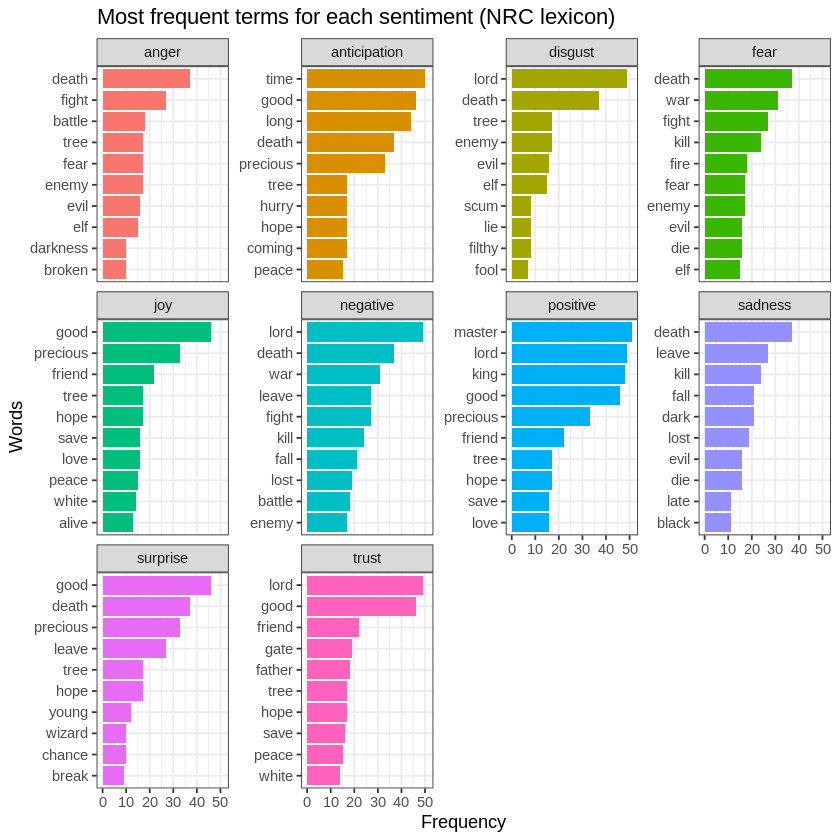

In [282]:
 tokens %>% 
  inner_join(nrc, "word") %>%
  count(sentiment, word, sort=T) %>%
  group_by(sentiment) %>%
  arrange(desc(n)) %>%
  slice(1:10) %>%
  ggplot(aes(x=reorder(word, n), y=n)) +
  geom_col(aes(fill=sentiment), show.legend=FALSE) +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  facet_wrap(~sentiment, scales="free_y") +
  labs(y="Frequency", x="Words", 
       title="Most frequent terms for each sentiment (NRC lexicon)") +
  coord_flip() +
  theme_bw()

각 감정과 함께 사용된 단어들의 빈도 수를 확인한 결과

"Lord"가 'positive', 'negative', 'trust', 'disgust'에서 빈도수가 상위권이다.

'positive', 'trust'와 'negative', 'disgust'가 서로 상반되는 감정임에도 

양측에서 높은 빈도수로 관측되는 것을 고려하여 "Lord"를 제거하고 다시 확인

In [283]:
tokens <- tokens[!(tokens$word == "lord" ), ]

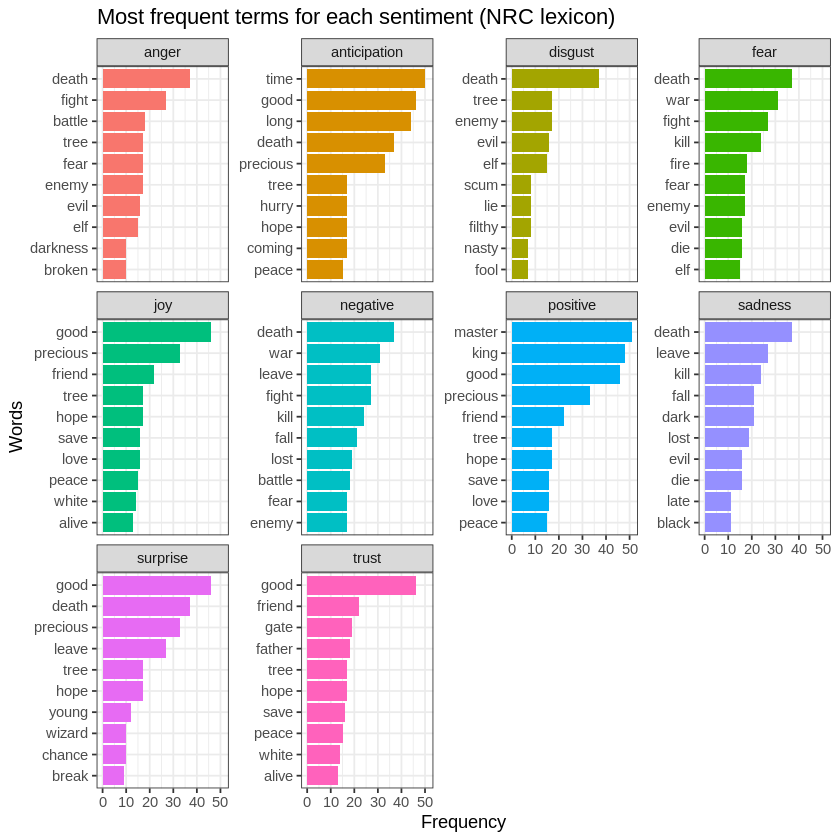

In [284]:
 tokens %>% 
  inner_join(nrc, "word") %>%
  count(sentiment, word, sort=T) %>%
  group_by(sentiment) %>%
  arrange(desc(n)) %>%
  slice(1:10) %>%
  ggplot(aes(x=reorder(word, n), y=n)) +
  geom_col(aes(fill=sentiment), show.legend=FALSE) +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  facet_wrap(~sentiment, scales="free_y") +
  labs(y="Frequency", x="Words", 
       title="Most frequent terms for each sentiment (NRC lexicon)") +
  coord_flip() +
  theme_bw()

각 캐릭터들의 nrc 범주에 따른 감정 상태 확인

토큰 재작성

In [285]:
tokens <- scripts %>%  
  mutate(dialogue=as.character(scripts$dialog)) %>%
  unnest_tokens(word, dialogue)

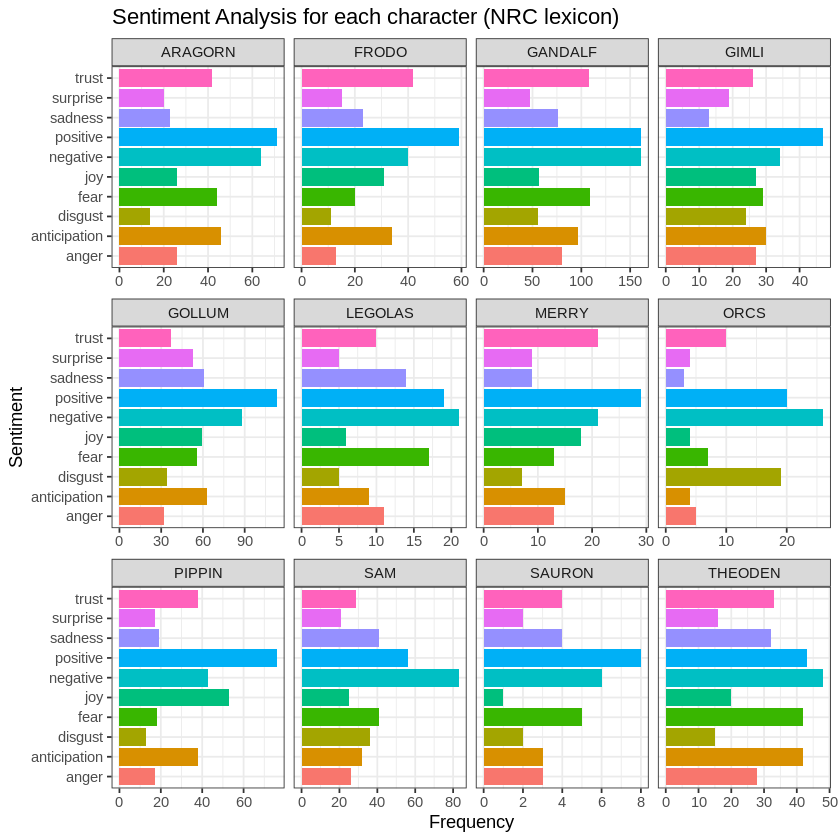

In [289]:
tokens %>%
  filter(char %in% c("FRODO","SAM","GANDALF","ARAGORN","PIPPIN", "ORCS",
                     "MERRY","GOLLUM","GIMLI","THEODEN", "LEGOLAS", "SAURON")) %>%
  inner_join(nrc, "word") %>%
  count(char, sentiment, sort=TRUE) %>%
  ggplot(aes(x=sentiment, y=n)) +
  geom_col(aes(fill=sentiment), show.legend=FALSE) +
  facet_wrap(~char, scales="free_x") +
  labs(x="Sentiment", y="Frequency", 
       title="Sentiment Analysis for each character (NRC lexicon)") +
  coord_flip() +
  theme_bw()

영화에서 느꼈던 것을 기반으로 하였을 때

프로도의 경우 절망적이고, 부정적이며 포기하려는 모습을 자주 보이는 캐릭터로 느껴지지만 실제 데이터에서는 긍정이 부정보다 높으며, 여타 감정에서는 기대감과 기쁨이 높게 나타났다.

샘의 경우에는 반대로 프로도에게 희망을 주는 존재로 나타나지만 실제 대사를 살펴보면 부정적인 감정 'negative', 'fear'의 빈도가 상당히 높다.

간달프는 꽤나 중립적인 편으로 보이며 오크는 'negative'와 'disgust'가 높게 나타나 일반적으로 떠올릴 수 있는 이미지와 동일했다.